<a href="https://colab.research.google.com/github/gsangf10/Analysis_Algorithm/blob/main/Analysis_%EB%AC%B8%EC%A0%9C_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2015 ~ 2022 데이터를 합쳐 행복지수 예측

In [ ]:
# 데이터 설명
# Country: 국가
# Region: 국가의 지역
# Happiness Rank: 행복지수 순위
# Happiness Score: 행복지수 점수
# GDP per capita: 1인당 GDP
# Healthy Life Expectancy: 건강 기대수명
# Social support: 사회적 지원(대인관계)
# Freedom to make life choices: 삶에 대한 선택의 자유
# Generosity: 관용
# Corruption Perception: 부정부패
# Dystopia + Residual: 사회에 대한 불안함

# 데이터 읽어오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_15 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2015.csv')
df_16 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2016.csv')
df_17 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2017.csv')
df_18 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2018.csv')
df_19 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2019.csv')
df_20 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2020.csv')
df_21 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2021.csv')
df_22 = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/World Happiness Report/2022.csv')

 # 2015 ~ 2022 행복지수 데이터를 통합하여 테이터 프레임으로 만들기

## 필요없는 특성 삭제

In [ ]:
df_15.drop(['Region', 'Standard Error', 'Family'], axis=1, inplace=True)
df_16.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Family'], axis=1, inplace=True)
df_17.drop(['Whisker.high', 'Whisker.low', 'Family'], axis=1, inplace=True)
df_20.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker'
          , 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'
          , 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True)
df_21.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker'
          , 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'
          , 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True)
df_22.drop(['Whisker-high', 'Whisker-low'], axis=1, inplace=True)

df_list = [df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22]
years = [i for i in range(2015,2023)]

for y, df in zip(years, df_list):
  print(y, df.columns, len(df.columns))

2015 Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object') 9
2016 Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object') 9
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 9
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 9
2019 Index(['Overall rank', 'Country or region', 'Score'

## 특성명 통일화
- Country, Rank, Score, GDP, Healthy, Social support, Freedom, Generosity, Corruption Perception, Dystopia + Residual

In [ ]:
country = ['Country', 'Country or region', 'Country name']
rank = ['Rank', 'Happiness Rank', 'Happiness.Rank', 'Overall rank', 'RANK']
score = ['Score', 'Happiness score', 'Happiness Score', 'Happiness.Score', 'Ladder score']
gdp = ['GDP', 'Economy (GDP per Capita)', 'Economy..GDP.per.Capita.', 'GDP per capita', 'Explained by: Log GDP per capita', 'Explained by: GDP per capita']
healthy = ['Health', 'Health (Life Expectancy)', 'Health..Life.Expectancy.', 'Healthy life expectancy', 'Explained by: Healthy life expectancy']
social_support = ['Social Support', 'Social support', 'Explained by: Social support']
freedom = ['Freedom', 'Freedom to make life choices', 'Explained by: Freedom to make life choices']
generosity = ['Generosity', 'Explained by: Generosity']
corription_perception = ['Corruption Perceptions', 'Trust (Government Corruption)', 'Trust..Government.Corruption.', 'Perceptions of corruption', 'Explained by: Perceptions of corruption']
dystopia_residual = ['Dystopia + Residual', 'Dystopia Residual', 'Dystopia.Residual', 'Dystopia + residual', 'Dystopia (1.83) + residual']

col_list = [country, rank, score, gdp, healthy, social_support, freedom, generosity, corription_perception, dystopia_residual]

for i in range(len(col_list)):
  df_15.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)
  df_16.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)
  df_17.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)
  df_18.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)
  df_19.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)
  df_20.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)
  df_21.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)
  df_22.rename(columns=lambda x : col_list[i][0] if x in col_list[i] else x, inplace=True)

df_list = [df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22]
years = [i for i in range(2015,2023)]

for y, df in zip(years, df_list):
  print(y, df.columns, len(df.columns))

2015 Index(['Country', 'Rank', 'Score', 'GDP', 'Health', 'Freedom',
       'Corruption Perceptions', 'Generosity', 'Dystopia + Residual'],
      dtype='object') 9
2016 Index(['Country', 'Rank', 'Score', 'GDP', 'Health', 'Freedom',
       'Corruption Perceptions', 'Generosity', 'Dystopia + Residual'],
      dtype='object') 9
2017 Index(['Country', 'Rank', 'Score', 'GDP', 'Health', 'Freedom', 'Generosity',
       'Corruption Perceptions', 'Dystopia + Residual'],
      dtype='object') 9
2018 Index(['Rank', 'Country', 'Score', 'GDP', 'Social Support', 'Health',
       'Freedom', 'Generosity', 'Corruption Perceptions'],
      dtype='object') 9
2019 Index(['Rank', 'Country', 'Score', 'GDP', 'Social Support', 'Health',
       'Freedom', 'Generosity', 'Corruption Perceptions'],
      dtype='object') 9
2020 Index(['Country', 'Score', 'GDP', 'Social Support', 'Health', 'Freedom',
       'Generosity', 'Corruption Perceptions', 'Dystopia + Residual'],
      dtype='object') 9
2021 Index(['Country',

## 수치형 데이터 형변환

In [ ]:
df_22['GDP'] = pd.to_numeric(df_22['GDP'].str.replace(',','.'))
df_22['Score'] = pd.to_numeric(df_22['Score'].str.replace(',','.'))
df_22['Health'] = pd.to_numeric(df_22['Health'].str.replace(',','.'))
df_22['Freedom'] = pd.to_numeric(df_22['Freedom'].str.replace(',','.'))
df_22['Generosity'] = pd.to_numeric(df_22['Generosity'].str.replace(',','.'))
df_22['Social Support'] = pd.to_numeric(df_22['Social Support'].str.replace(',','.'))
df_22['Dystopia + Residual'] = pd.to_numeric(df_22['Dystopia + Residual'].str.replace(',','.'))
df_22['Corruption Perceptions'] = pd.to_numeric(df_22['Corruption Perceptions'].str.replace(',','.'))

## 데이터 프레임 하나로 합치기

In [ ]:
df = pd.concat([df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22])
df = df.reset_index(drop=True)
df

,Country,Rank,Score,GDP,Health,Freedom,Corruption Perceptions,Generosity,Dystopia + Residual,Social Support
0,Switzerland,1.0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738,NaN
1,Iceland,2.0,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201,NaN
2,Denmark,3.0,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204,NaN
3,Norway,4.0,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531,NaN
4,Canada,5.0,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176,NaN
...,...,...,...,...,...,...,...,...,...,...
1226,Rwanda*,143.0,3.268,0.78500,0.46200,0.62100,0.54400,0.18700,0.53600,0.133
1227,Zimbabwe,144.0,2.995,0.94700,0.27000,0.32900,0.10500,0.10600,0.54800,0.690
1228,Lebanon,145.0,2.955,1.39200,0.63100,0.10300,0.03400,0.08200,0.21600,0.498
1229,Afghanistan,146.0,2.404,0.75800,0.28900,0.00000,0.00500,0.08900,1.26300,0.000


# 범주 데이터 유형 통일

In [ ]:
c_list = df['Country'].values

#  일관성을 위해 데이터 수정
for i in range(len(c_list)):
  c_list[i] = c_list[i].replace('&', 'and')
  c_list[i] = c_list[i].replace('*', '')
  c_list[i] = c_list[i].replace(',', '')
  c_list[i] = c_list[i].replace(' S.A.R. China', '')
  c_list[i] = c_list[i].replace(' S.A.R., China', '')
  c_list[i] = c_list[i].replace(' S.A.R. of China', '')

df['Country'] = c_list
df

,Country,Rank,Score,GDP,Health,Freedom,Corruption Perceptions,Generosity,Dystopia + Residual,Social Support
0,Switzerland,1.0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738,NaN
1,Iceland,2.0,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201,NaN
2,Denmark,3.0,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204,NaN
3,Norway,4.0,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531,NaN
4,Canada,5.0,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176,NaN
...,...,...,...,...,...,...,...,...,...,...
1226,Rwanda,143.0,3.268,0.78500,0.46200,0.62100,0.54400,0.18700,0.53600,0.133
1227,Zimbabwe,144.0,2.995,0.94700,0.27000,0.32900,0.10500,0.10600,0.54800,0.690
1228,Lebanon,145.0,2.955,1.39200,0.63100,0.10300,0.03400,0.08200,0.21600,0.498
1229,Afghanistan,146.0,2.404,0.75800,0.28900,0.00000,0.00500,0.08900,1.26300,0.000


# 오기입 데이터 처리

In [ ]:
df.drop(df[df['Country'] == 'xx'].index, axis=0, inplace=True)
df

,Country,Rank,Score,GDP,Health,Freedom,Corruption Perceptions,Generosity,Dystopia + Residual,Social Support
0,Switzerland,1.0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738,NaN
1,Iceland,2.0,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201,NaN
2,Denmark,3.0,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204,NaN
3,Norway,4.0,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531,NaN
4,Canada,5.0,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176,NaN
...,...,...,...,...,...,...,...,...,...,...
1225,Botswana,142.0,3.471,1.50300,0.28000,0.57100,0.10200,0.01200,0.18700,0.815
1226,Rwanda,143.0,3.268,0.78500,0.46200,0.62100,0.54400,0.18700,0.53600,0.133
1227,Zimbabwe,144.0,2.995,0.94700,0.27000,0.32900,0.10500,0.10600,0.54800,0.690
1228,Lebanon,145.0,2.955,1.39200,0.63100,0.10300,0.03400,0.08200,0.21600,0.498


# 결측치 채우기

In [ ]:
df.fillna(0, inplace=True)
df

,Country,Rank,Score,GDP,Health,Freedom,Corruption Perceptions,Generosity,Dystopia + Residual,Social Support
0,Switzerland,1.0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738,0.000
1,Iceland,2.0,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201,0.000
2,Denmark,3.0,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204,0.000
3,Norway,4.0,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531,0.000
4,Canada,5.0,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176,0.000
...,...,...,...,...,...,...,...,...,...,...
1225,Botswana,142.0,3.471,1.50300,0.28000,0.57100,0.10200,0.01200,0.18700,0.815
1226,Rwanda,143.0,3.268,0.78500,0.46200,0.62100,0.54400,0.18700,0.53600,0.133
1227,Zimbabwe,144.0,2.995,0.94700,0.27000,0.32900,0.10500,0.10600,0.54800,0.690
1228,Lebanon,145.0,2.955,1.39200,0.63100,0.10300,0.03400,0.08200,0.21600,0.498


# 수치형 데이터 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

target = df['Score']
c_data = df[['Country']]
n_data = df.drop(['Score', 'Country'], axis=1)
n_data

ss = StandardScaler()
ss.fit(n_data)
ns_data = ss.transform(n_data)
ns_data = pd.DataFrame(ns_data, columns=n_data.columns)
ns_data

,Rank,GDP,Health,Freedom,Corruption Perceptions,Generosity,Dystopia + Residual,Social Support
0,-1.125542,0.965949,1.382114,1.456007,2.609711,0.824401,0.925469,-1.133267
1,-1.106055,0.749455,1.408695,1.217591,0.097485,2.032633,1.103357,-1.133267
2,-1.086568,0.802688,1.105150,1.351117,3.185484,1.210720,0.901055,-1.133267
3,-1.067081,1.109581,1.148982,1.482959,2.115534,1.259215,0.875301,-1.133267
4,-1.047594,0.804550,1.233659,1.244802,1.795469,2.221505,0.862245,-1.133267
...,...,...,...,...,...,...,...,...
1225,1.622129,1.210714,-1.360696,0.843316,-0.258593,-1.641770,-1.319808,0.277778
1226,1.641616,-0.439595,-0.605980,1.167251,3.730929,-0.126285,-0.983553,-0.902999
1227,1.661103,-0.067241,-1.402164,-0.724532,-0.231515,-0.827738,-0.971991,0.061360
1228,1.680590,0.955583,0.094827,-2.188720,-0.872366,-1.035576,-1.291867,-0.271058


# 범주형 데이터 ont-hot 인코딩

In [ ]:
def one_hot_encode(col) :
  clen = len(col.unique()) # 범주 데이터의 개수 (== 단위행렬의 크기를 결정)
  rlen = len(col.values)

  eye1 = np.eye(clen) # 해당 컬럼의 범주별 데이터로 원핫인코딩된 행을 얻기 위한 단위행렬

  labeled_data = pd.Series(np.arange(len(col.unique())), index=col.unique()) # 해당 컬럼의 범주를 숫자형으로 레이블링(단위행렬에 적용하기 위함)
  eye_idx = labeled_data[col]  # 레이블된 데이터를 가져옴

  col_list = [] # 컬럼 명을 저장하기 위한 리스트
  for cate_nm in pd.unique(col) :
    col_nm = col.name + '_' + cate_nm # 인코딩된 각 컬럼의 이름 생성
    col_list.append(col_nm)
  
  return pd.DataFrame(eye1[eye_idx], columns=col_list) # 해당 컬럼의 인코딩된 결과 반환

for col in c_data.columns : # 모든 열에 대해서 인코딩 진행
  encoded_df = one_hot_encode(c_data[col])
  c_data = pd.concat((c_data, encoded_df), axis=1)
  c_data = c_data.drop(c_data[col].name, axis=1)

# 범주형과 수치형 데이터 합치기

In [ ]:
t_data = pd.concat([c_data, ns_data], axis=1)
t_data

,Country_Switzerland,Country_Iceland,Country_Denmark,Country_Norway,Country_Canada,Country_Finland,Country_Netherlands,Country_Sweden,Country_New Zealand,Country_Australia,...,Country_Congo,Country_Eswatini Kingdom of,Rank,GDP,Health,Freedom,Corruption Perceptions,Generosity,Dystopia + Residual,Social Support
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.125542,0.965949,1.382114,1.456007,2.609711,0.824401,0.925469,-1.133267
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.106055,0.749455,1.408695,1.217591,0.097485,2.032633,1.103357,-1.133267
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.086568,0.802688,1.105150,1.351117,3.185484,1.210720,0.901055,-1.133267
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.067081,1.109581,1.148982,1.482959,2.115534,1.259215,0.875301,-1.133267
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.047594,0.804550,1.233659,1.244802,1.795469,2.221505,0.862245,-1.133267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.622129,1.210714,-1.360696,0.843316,-0.258593,-1.641770,-1.319808,0.277778
1226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.641616,-0.439595,-0.605980,1.167251,3.730929,-0.126285,-0.983553,-0.902999
1227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.661103,-0.067241,-1.402164,-0.724532,-0.231515,-0.827738,-0.971991,0.061360
1228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.680590,0.955583,0.094827,-2.188720,-0.872366,-1.035576,-1.291867,-0.271058


# 훈련, 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(t_data, target, random_state=1)

# 선형회귀 모델 학습 및 평가

0.9536546983704421 0.9278305103742074


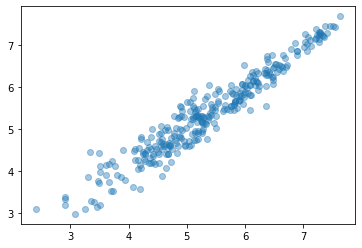

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(trd, trt)
print(lr.score(trd, trt), lr.score(tsd, tst))

tsd_p = lr.predict(tsd)
plt.scatter(tst, tsd_p, alpha=0.4)

# 테스트 데이터로 예측 값과 비교

In [ ]:
test_data = tsd.iloc[:1]
tdp = lr.predict(test_data) # 예측된 행복지수
real_score = tst.iloc[:1].values # 실제 행복지수

print(tdp, real_score)

[6.29156779] [6.361]
